In [2]:
# Load modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from lifelines import KaplanMeierFitter

In [3]:
# Load Major Salivary Tumor Listing data
salivary_df = pd.read_csv("SEEROutput.csv",low_memory=False)

In [4]:
# Look at data header
display(salivary_df.head())
display(salivary_df.info())
display(salivary_df.columns)

,Patient ID,Age recode with <1 year olds,Sex,Year of diagnosis,PRCDA 2020,"Race recode (W, B, AI, API)","Origin recode NHIA (Hispanic, Non-Hisp)",Site recode ICD-O-3/WHO 2008,Behavior code ICD-O-3,Primary Site - labeled,...,"Race recode (White, Black, Other)",Age recode with <1 year olds and 90+,Age recode with single ages and 85+,Age recode with single ages and 90+,Race/ethnicity,Year of follow-up recode,Year of death recode,Marital status at diagnosis,Median household income inflation adj to 2022,Rural-Urban Continuum Code
0,1154,75-79 years,Male,2016,Not PRCDA,White,Non-Spanish-Hispanic-Latino,Salivary Gland,Malignant,C07.9-Parotid gland,...,White,75-79 years,79 years,79 years,White,2017,2017,Married (including common law),"$120,000+",Counties in metropolitan areas ge 1 million pop
1,2966,85+ years,Male,2002,Not PRCDA,White,Non-Spanish-Hispanic-Latino,Salivary Gland,Malignant,C07.9-Parotid gland,...,White,85-89 years,85+ years,89 years,White,2009,2009,Married (including common law),"$110,000 - $119,999",Counties in metropolitan areas ge 1 million pop
2,3425,70-74 years,Male,2006,Not PRCDA,Asian or Pacific Islander,Non-Spanish-Hispanic-Latino,NHL - Extranodal,Malignant,C07.9-Parotid gland,...,"Other (American Indian/AK Native, Asian/Pacifi...",70-74 years,72 years,72 years,Chinese,2021,Alive at last contact,Married (including common law),"$110,000 - $119,999",Counties in metropolitan areas ge 1 million pop
3,4395,65-69 years,Female,2019,Not PRCDA,White,Non-Spanish-Hispanic-Latino,Salivary Gland,Malignant,C07.9-Parotid gland,...,White,65-69 years,65 years,65 years,White,2021,Alive at last contact,Divorced,"$120,000+",Counties in metropolitan areas ge 1 million pop
4,5623,55-59 years,Female,2019,Not PRCDA,Asian or Pacific Islander,Non-Spanish-Hispanic-Latino,Salivary Gland,Malignant,C07.9-Parotid gland,...,"Other (American Indian/AK Native, Asian/Pacifi...",55-59 years,56 years,56 years,Filipino,2021,Alive at last contact,Married (including common law),"$120,000+",Counties in metropolitan areas ge 1 million pop


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28030 entries, 0 to 28029
Data columns (total 64 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   Patient ID                                                 28030 non-null  int64 
 1   Age recode with <1 year olds                               28030 non-null  object
 2   Sex                                                        28030 non-null  object
 3   Year of diagnosis                                          28030 non-null  int64 
 4   PRCDA 2020                                                 28030 non-null  object
 5   Race recode (W, B, AI, API)                                28030 non-null  object
 6   Origin recode NHIA (Hispanic, Non-Hisp)                    28030 non-null  object
 7   Site recode ICD-O-3/WHO 2008                               28030 non-null  object
 8   Behavior code IC

None

Index(['Patient ID', 'Age recode with <1 year olds', 'Sex',
       'Year of diagnosis', 'PRCDA 2020', 'Race recode (W, B, AI, API)',
       'Origin recode NHIA (Hispanic, Non-Hisp)',
       'Site recode ICD-O-3/WHO 2008', 'Behavior code ICD-O-3',
       'Primary Site - labeled', 'Primary Site', 'Histologic Type ICD-O-3',
       'Grade Recode (thru 2017)', 'Derived Summary Grade 2018 (2018+)',
       'Grade Clinical (2018+)', 'Grade Pathological (2018+)', 'Laterality',
       'Diagnostic Confirmation', 'ICD-O-3 Hist/behav',
       'ICD-O-3 Hist/behav, malignant', 'Histology recode - broad groupings',
       'Site recode ICD-O-3/WHO 2008 (for SIRs)',
       'Combined Summary Stage (2004+)', 'Summary stage 2000 (1998-2017)',
       'SEER Combined Summary Stage 2000 (2004-2017)',
       'SEER historic stage A (1973-2015)', 'RX Summ--Surg Prim Site (1998+)',
       'RX Summ--Scope Reg LN Sur (2003+)',
       'RX Summ--Surg Oth Reg/Dis (2003+)', 'RX Summ--Surg/Rad Seq',
       'Reason no can

    display(salivary_df[col].value_counts())
# SEER Salivary Tumor Data Missing Values
Although it appears that there are minimal null values, this is likely due to the way that data have been logged. For each relevant column, we may need to address missing values individually. They may be logged as, for example, 'XX' or '99'. As such, we will always view unique values in each column before evaluations


# Treatment Modalities Evaluation

In [15]:
colsOfInterest_Tx = ['RX Summ--Scope Reg LN Sur (2003+)',
                  'RX Summ--Surg Oth Reg/Dis (2003+)', 'RX Summ--Surg/Rad Seq',
                  'Reason no cancer-directed surgery', 'Radiation recode',
                  'Chemotherapy recode (yes, no/unk)',
                  'RX Summ--Systemic/Sur Seq (2007+)']
for col in colsOfInterest_Tx:
    display(salivary_df[col].value_counts())

RX Summ--Scope Reg LN Sur (2003+)
4 or more regional lymph nodes removed                        8328
1 to 3 regional lymph nodes removed                           3993
Blank(s)                                                      3073
Unknown or not applicable                                     1689
Number of regional lymph nodes removed unknown                 408
Biopsy or aspiration of regional lymph node, NOS               367
Sentinel node biopsy and lym nd removed same/unstated time      37
Sentinel lymph node biopsy                                      31
Sentinel node biopsy and lym nd removed different times         17
Name: count, dtype: int64

RX Summ--Surg Oth Reg/Dis (2003+)
None; diagnosed at autopsy                                      23950
Blank(s)                                                         3073
Non-primary surgical procedure to other regional sites            337
Unknown; death certificate only                                   328
Non-primary surgical procedure performed                          177
Non-primary surgical procedure to distant site                    110
Non-primary surgical procedure to distant lymph node(s)            34
Any combo of sur proc to oth rg, dis lym nd, and/or dis site       21
Name: count, dtype: int64

RX Summ--Surg/Rad Seq
No radiation and/or no surgery; unknown if surgery and/or radiation given    16289
Radiation after surgery                                                      11541
Radiation prior to surgery                                                      86
Radiation before and after surgery                                              68
Sequence unknown, but both were given                                           32
Intraoperative radiation                                                         9
Intraoperative rad with other rad before/after surgery                           4
Surgery both before and after radiation                                          1
Name: count, dtype: int64

Reason no cancer-directed surgery
Surgery performed                                                               21971
Not recommended                                                                  4830
Recommended but not performed, unknown reason                                     430
Unknown; death certificate; or autopsy only (2003+)                               310
Not recommended, contraindicated due to other cond; autopsy only (1973-2002)      208
Recommended but not performed, patient refused                                    179
Recommended, unknown if performed                                                  84
Not performed, patient died prior to recommended surgery                           18
Name: count, dtype: int64

Radiation recode
None/Unknown                                             13469
Beam radiation                                           13454
Refused (1988+)                                            487
Recommended, unknown if administered                       419
Radiation, NOS  method or source not specified             166
Combination of beam with implants or isotopes               19
Radioactive implants (includes brachytherapy) (1988+)       10
Radioisotopes (1988+)                                        6
Name: count, dtype: int64

Chemotherapy recode (yes, no/unk)
No/Unknown    23439
Yes            4591
Name: count, dtype: int64

RX Summ--Systemic/Sur Seq (2007+)
No systemic therapy and/or surgical procedures             17804
Blank(s)                                                    7657
Systemic therapy after surgery                              2463
Systemic therapy before surgery                               57
Systemic therapy both before and after surgery                30
Sequence unknown                                              15
Surgery both before and after systemic therapy                 3
Intraop systemic rx & oth systemic rx before/after surg        1
Name: count, dtype: int64

# SEER Salivary Tumor Data Missing Values
Although it appears that there are minimal null values, this is likely due to the way that data have been logged. For each relevant column, we will need to address missing values individually. They may be logged as, for example, 'XX' or '99'.


# Age with 90+ and Other Categorical Adjustments 

In [21]:
# Select relevant columns for demographic analysis
age_colname = 'Age recode with single ages and 90+'
age_bin_colname = 'Age_Binned'
race_colname = 'Race recode (W, B, AI, API)'
sex_colname = 'Sex'
ses_colname = 'Median household income inflation adj to 2022'

demographic_columns = [age_colname,race_colname,sex_colname, ses_colname]

# Remove 'years'
salivary_df[age_colname] = salivary_df[age_colname].str.replace(' years','') 

# Organize age column as a categorical with numerical order
numerical_years = salivary_df[age_colname].str.extract(r'(\d+)').astype(float)
# print(numerical_years[0].unique())
# Input numerical age data into the dataframe
salivary_df['Numerical_Age'] = numerical_years


# Define 5-year bins from 0 to 90+, using float to allow for infinity in the final bin
bins = np.concatenate([np.arange(0, 95, 5), [np.inf]])  # Include infinity in the last bin

# Create labels for the bins, including '90+' for the last bin
labels = [f'{i}-{i+4}' for i in range(0, 90, 5)] + ['90+']

# Apply pd.cut to create the binned age categories
salivary_df[age_bin_colname] = pd.cut(salivary_df['Numerical_Age'], bins=bins, labels=labels, right=False, include_lowest=True)

# Check the unique values of the new binned age column
# print(salivary_df[age_bin_colname].unique())

In [6]:
# Create a mapping for values with leading zeros and handle special cases:
# - Convert '00' and '<1' to '≤1'
# - Remove leading zeros for values like '02', '03', etc.
# - Leave '90' as it is

sorted_ages = salivary_df[age_colname].unique()
age_mapping = {
    age: '≤1' if age == '00' or age == '<1' else (str(int(age)) if age.isdigit() and int(age) < 10 else age)
    for age in sorted_ages
}

# Replace values in the age column using the mapping
salivary_df[age_colname] = salivary_df[age_colname].replace(age_mapping)

# Get the sorted unique ages after the mapping has been applied
# Ensure '≤1' comes first by assigning key paramter = -1
# Otherwise: get rid of "+" at the end of 90
sorted_ages = sorted(
    salivary_df[age_colname].unique(),
    key=lambda x: (-1 if '≤1' in x else float(x.replace('+', '').replace('≤', '').replace('<', ''))) if x != '90+' else 90
)

# Convert the 'age_colname' column to categorical with sorted order
salivary_df[age_colname] = pd.Categorical(salivary_df[age_colname], categories=sorted_ages, ordered=True)

# Sex order
sex_order = ['Female','Male']

# Convert Sex column to reflect new order
salivary_df[sex_colname] = pd.Categorical(
    salivary_df[sex_colname], categories=sex_order, ordered=True
)

# Race order
race_order = sorted(salivary_df[race_colname].unique())

# Convert race column to reflect new world order
salivary_df[race_colname] = pd.Categorical(
    salivary_df[race_colname], categories=race_order, ordered=True
)

display(salivary_df[age_colname].unique)



<bound method Series.unique of 0        79
1        89
2        72
3        65
4        56
         ..
28025    64
28026    74
28027    60
28028    87
28029    65
Name: Age recode with single ages and 90+, Length: 28030, dtype: category
Categories (90, object): ['≤1' < '2' < '3' < '4' ... '87' < '88' < '89' < '90+']>

In [42]:
# SES
# sorted_ses_mapping = {
#     salivary_df[ses_colname].unique()
# }
# Define the order of categories, excluding the "Unknown/missing/no match/Not 1990-2022"
socioeconomic_order = [
    "<$40,000", "$40,000 - $44,999", "$45,000 - $49,999", "$50,000 - $54,999",
    "$55,000 - $59,999", "$60,000 - $64,999", "$65,000 - $69,999", "$70,000 - $74,999",
    "$75,000 - $79,999", "$80,000 - $84,999", "$85,000 - $89,999", "$90,000 - $94,999",
    "$95,000 - $99,999", "$100,000 - $109,999", "$110,000 - $119,999", "$120,000+"
]

# Change to categorical
salivary_df[ses_colname] = pd.Categorical(
    salivary_df[ses_colname],
    categories=socioeconomic_order,
    ordered=True
)
display(salivary_df[ses_colname].unique())

# Categorize histological types
mec_code = ['8430']
acc_code = ['8200']
adenocarcinoma_code = ['8140','8147','8290','8310','8410','8440','8480','8525','8550']
mixed_code = ['8980','8981']
rare_code = ['8012','8041','8082','8562','8982']

all_codes = mec_code + acc_code + adenocarcinoma_code + mixed_code + rare_code

# Function to map each code to a category
def categorize_histology(code):
    if code in mec_code:
        return 'Mucoepidermoid Carcinoma'
    elif code in acc_code:
        return 'Adenoid Cystic Carcinoma'
    elif code in adenocarcinoma_code:
        return 'Adenocarcinoma'
    elif code in mixed_code:
        return 'Mixed Subtypes'
    elif code in rare_code:
        return 'Other Rare Types'
    else:
        return 'Other'

# Extract 4 digit ICD-O-3 Code:
salivary_df['ICD-O-3 Code'] = salivary_df['ICD-O-3 Hist/behav'].str.extract(r'(\d{4})')

# Filter the DataFrame to include only rows where the 'ICD-O-3 Code' is in your list of codes
filtered_df = salivary_df[salivary_df['ICD-O-3 Code'].isin(all_codes)]

# Use assign to apply the histology categorization
filtered_df = filtered_df.assign(Histology=filtered_df['ICD-O-3 Code'].apply(categorize_histology))

# View the filtered DataFrame
display(filtered_df[['ICD-O-3 Code', 'ICD-O-3 Hist/behav', 'Histology']])



['$120,000+', '$110,000 - $119,999', '$95,000 - $99,999', '$90,000 - $94,999', '$100,000 - $109,999', ..., NaN, '$55,000 - $59,999', '$50,000 - $54,999', '$45,000 - $49,999', '$40,000 - $44,999']
Length: 16
Categories (16, object): ['<$40,000' < '$40,000 - $44,999' < '$45,000 - $49,999' < '$50,000 - $54,999' ... '$95,000 - $99,999' < '$100,000 - $109,999' < '$110,000 - $119,999' < '$120,000+']

,ICD-O-3 Code,ICD-O-3 Hist/behav,Histology
0,8041,"8041/3: Small cell carcinoma, NOS",Other Rare Types
3,8200,8200/3: Adenoid cystic carcinoma,Adenoid Cystic Carcinoma
5,8041,"8041/3: Small cell carcinoma, NOS",Other Rare Types
6,8430,8430/3: Mucoepidermoid carcinoma,Mucoepidermoid Carcinoma
7,8430,8430/3: Mucoepidermoid carcinoma,Mucoepidermoid Carcinoma
...,...,...,...
28014,8550,8550/3: Acinar cell carcinoma,Adenocarcinoma
28015,8550,8550/3: Acinar cell carcinoma,Adenocarcinoma
28020,8430,8430/3: Mucoepidermoid carcinoma,Mucoepidermoid Carcinoma
28024,8430,8430/3: Mucoepidermoid carcinoma,Mucoepidermoid Carcinoma


# Age, Race, and Sex Proportions & Distributions

In [54]:
help(pd.DataFrame.groupby)


Help on function groupby in module pandas.core.frame:

groupby(self, by=None, axis: 'Axis | lib.NoDefault' = <no_default>, level: 'IndexLabel | None' = None, as_index: 'bool' = True, sort: 'bool' = True, group_keys: 'bool' = True, observed: 'bool | lib.NoDefault' = <no_default>, dropna: 'bool' = True) -> 'DataFrameGroupBy'
    Group DataFrame using a mapper or by a Series of columns.

    A groupby operation involves some combination of splitting the
    object, applying a function, and combining the results. This can be
    used to group large amounts of data and compute operations on these
    groups.

    Parameters
    ----------
    by : mapping, function, label, pd.Grouper or list of such
        Used to determine the groups for the groupby.
        If ``by`` is a function, it's called on each value of the object's
        index. If a dict or Series is passed, the Series or dict VALUES
        will be used to determine the groups (the Series' values are first
        aligned; see

In [59]:
# Calculate proportions of age bins grouped by sex
proportions = filtered_df.groupby(sex_colname)[age_bin_colname].value_counts(normalize=True)

print(proportions)

# Calculate proportions
proportions = filtered_df.groupby(sex_colname)[age_bin_colname].value_counts(normalize=True)*100


print(proportions)
print(salivary_df[age_bin_colname].cat.categories)
print(salivary_df[sex_colname].cat.categories)
print(salivary_df[race_colname].cat.categories)


Sex     Age_Binned
Female  65-69         0.100250
        60-64         0.100111
        50-54         0.098167
        55-59         0.095529
        70-74         0.092474
        45-49         0.076368
        75-79         0.072619
        40-44         0.062621
        80-84         0.052902
        35-39         0.052208
        30-34         0.044988
        25-29         0.037490
        85-89         0.035823
        20-24         0.030131
        15-19         0.016940
        90+           0.016523
        10-14         0.011386
        5-9           0.003332
        0-4           0.000139
Male    65-69         0.119322
        60-64         0.114825
        70-74         0.105382
        55-59         0.098936
        50-54         0.090541
        75-79         0.086794
        80-84         0.070904
        45-49         0.068655
        40-44         0.055164
        85-89         0.039874
        35-39         0.037775
        30-34         0.033428
        25-29       

AttributeError: Can only use .cat accessor with a 'category' dtype

## Age Breakdown
| Age   | Count | Percentage| Nothing |
|-------|-------|-------|---------|
| 0-4   | 2     |
| 5-9   | 35    |
| 10-14 | 129   |
| 15-19 | 221   |
| 20-24 | 330   |
| 25-29 | 412   |
| 30-34 | 547   |
| 35-39 | 628   |
| 40-44 | 819   |
| 45-49 | 1008  |
| 50-54 | 1311  |
| 55-59 | 1348  |
| 60-64 | 1487  |
| 65-69 | 1518  |
| 70-74 | 1369  |
| 75-79 | 1102  |
| 80-84 | 854   |
| 85-89 | 524   |
| 90+   | 229   |


/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_35459/64932703.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  racevage_histplot.set_xticklabels(x_labels, rotation=45)
/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_35459/64932703.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sexvage_countplot.set_xticklabels(x_labels, rotation=45)
/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_35459/64932703.py:44: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ses_countplot = sns.histplot(
/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_35459/64932703.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ses_countplot.set_xticklabels(ses_countplot.get_xticklabels(),r

Text(0, 0.5, 'Number of Cases')

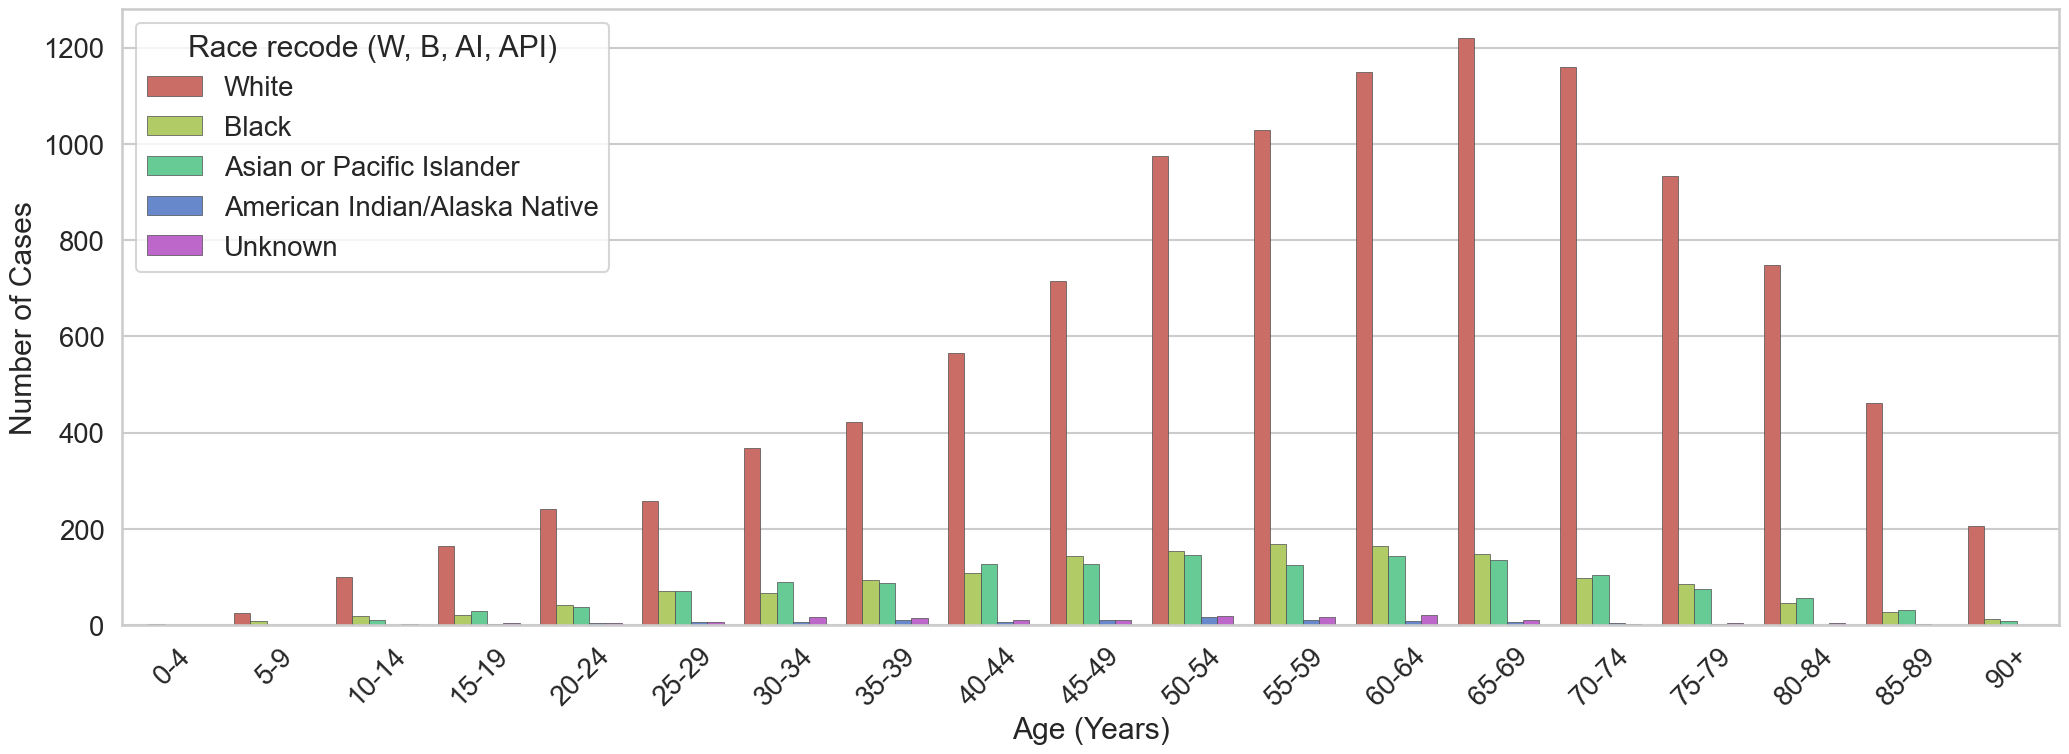

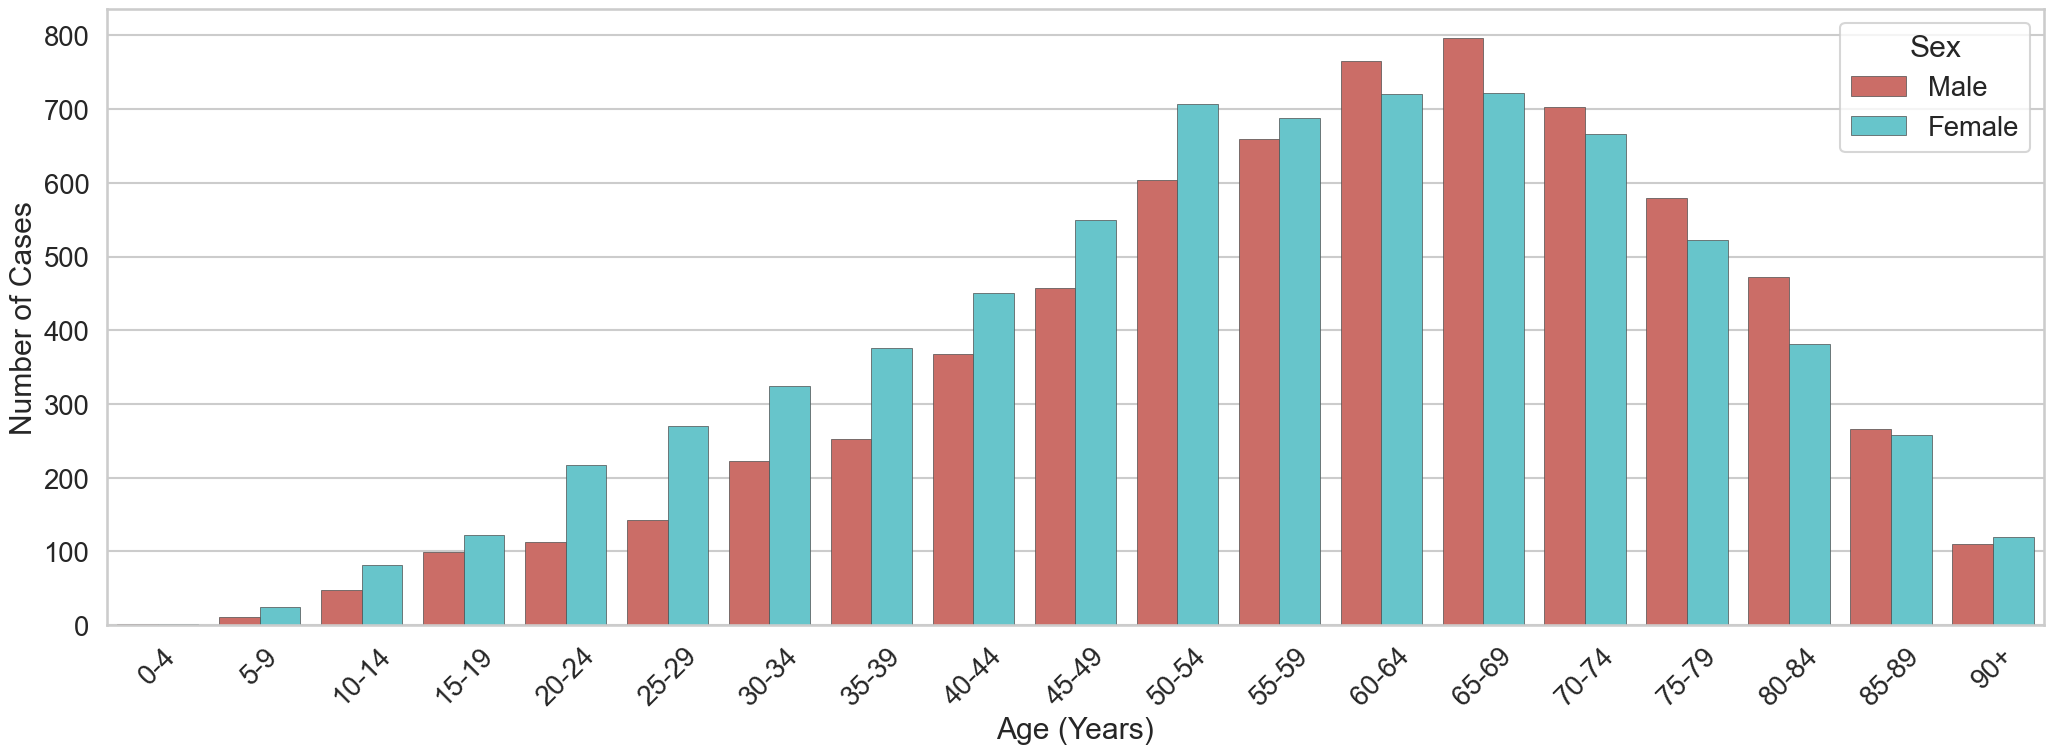

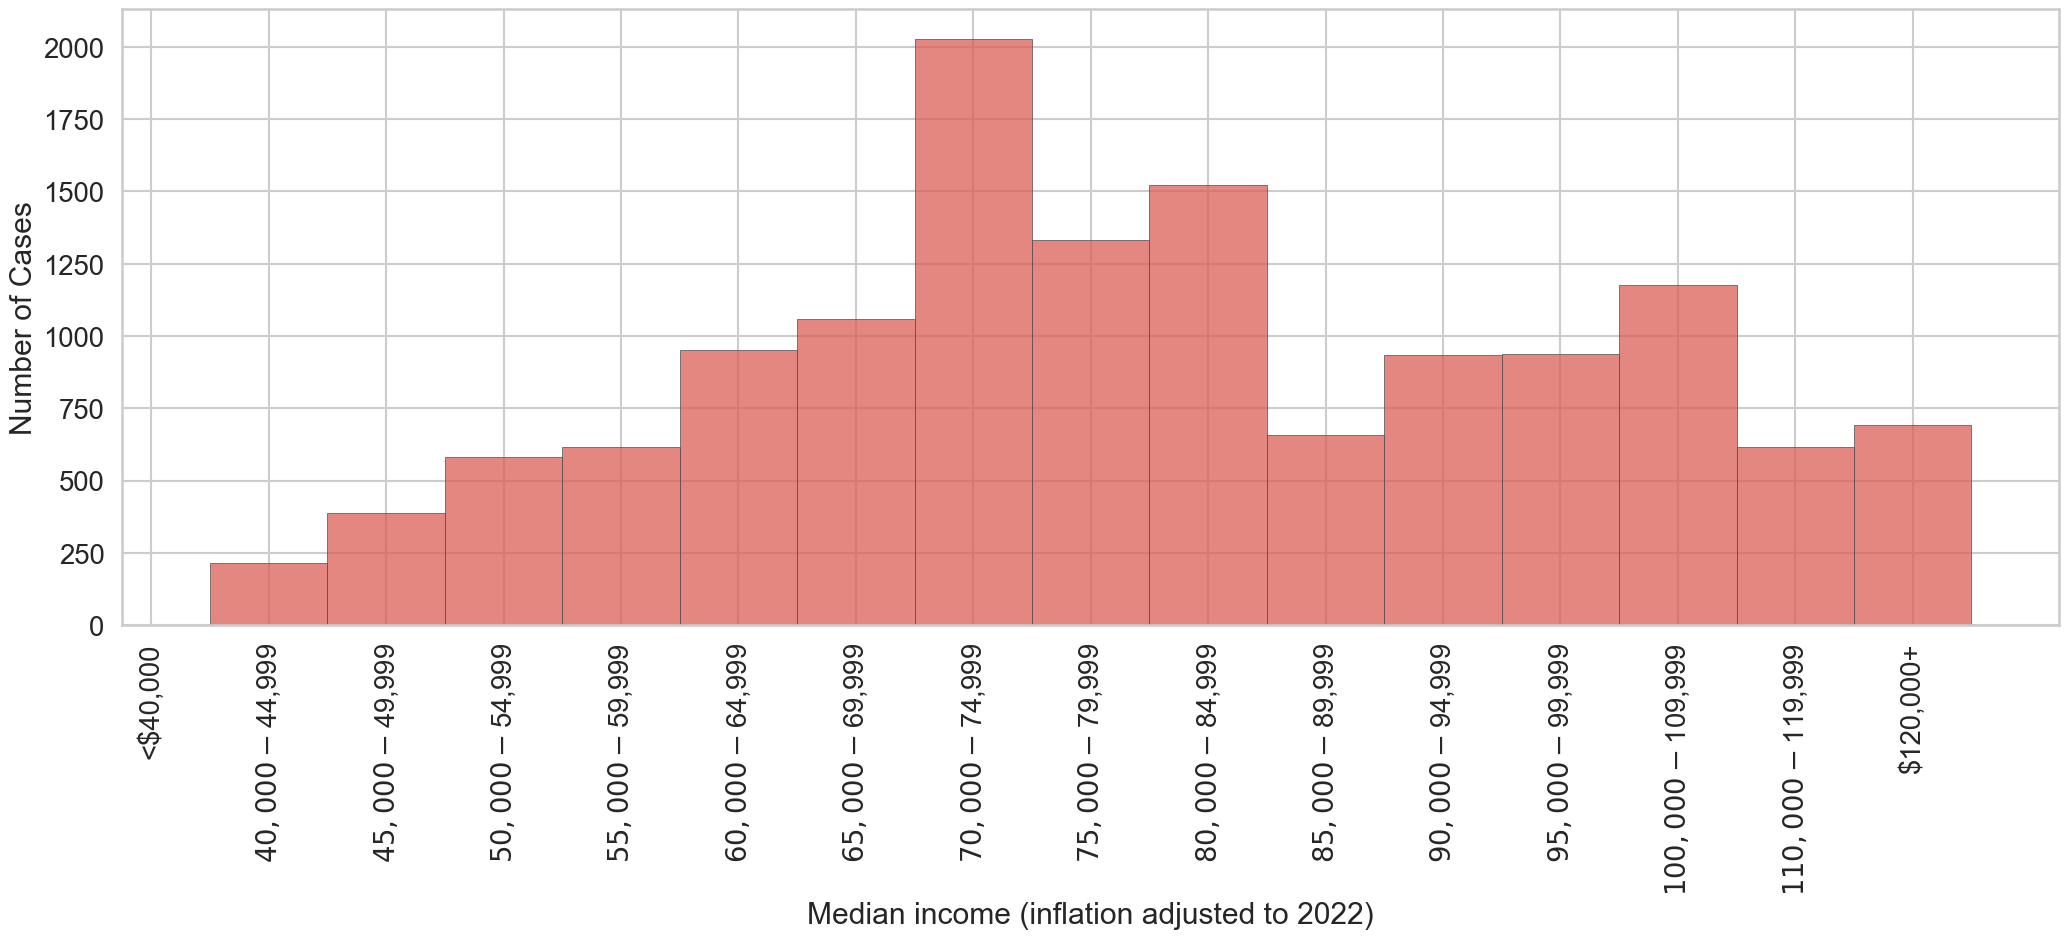

In [60]:
# Plot - countplot
sns.set_context('talk',font_scale=1.2)
sns.set_palette('hls')

# Race vs. Age
plt.figure(figsize=(25, 8))
racevage_histplot = sns.countplot(
    data=filtered_df,
    x=age_bin_colname,
    hue=race_colname,
    palette='hls',
    linewidth=0.5,
    edgecolor=".3",
    log_scale=False
)
x_labels = racevage_histplot.get_xticklabels()

# Rotate x tick labels
racevage_histplot.set_xticklabels(x_labels, rotation=45)

racevage_histplot.set_xlabel('Age (Years)')
racevage_histplot.set_ylabel('Number of Cases')

# Sex vs. Age
plt.figure(figsize=(25, 8))
sexvage_countplot = sns.countplot(
    data=filtered_df,
    x=age_bin_colname,
    hue=sex_colname,
    palette='hls',
    linewidth=0.5,
    edgecolor=".3",
    log_scale=False
)

# Rotate x tick labels
x_labels = sexvage_countplot.get_xticklabels()
sexvage_countplot.set_xticklabels(x_labels, rotation=45)
# sexvage_countplot.set_xticklabels(x_labels,rotation=90)
sexvage_countplot.set_xlabel('Age (Years)')
sexvage_countplot.set_ylabel('Number of Cases')

plt.figure(figsize=(25, 8))
ses_countplot = sns.histplot(
    data=filtered_df,
    x=ses_colname,
    palette='hls',
    linewidth=0.5,
    edgecolor=".3",
    log_scale=False
)

ses_countplot.set_xticklabels(ses_countplot.get_xticklabels(),rotation=90)
ses_countplot.set_xlabel('Median income (inflation adjusted to 2022)')
ses_countplot.set_ylabel('Number of Cases')


/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_31248/1940405346.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  racevage_histplot.set_xticklabels(x_labels, rotation=45)
/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_31248/1940405346.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sexvage_countplot.set_xticklabels(x_labels, rotation=45)
/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_31248/1940405346.py:44: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ses_countplot = sns.histplot(
/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_31248/1940405346.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ses_countplot.set_xticklabels(ses_countplot.get_xtickla

Text(0, 0.5, 'Number of Cases')

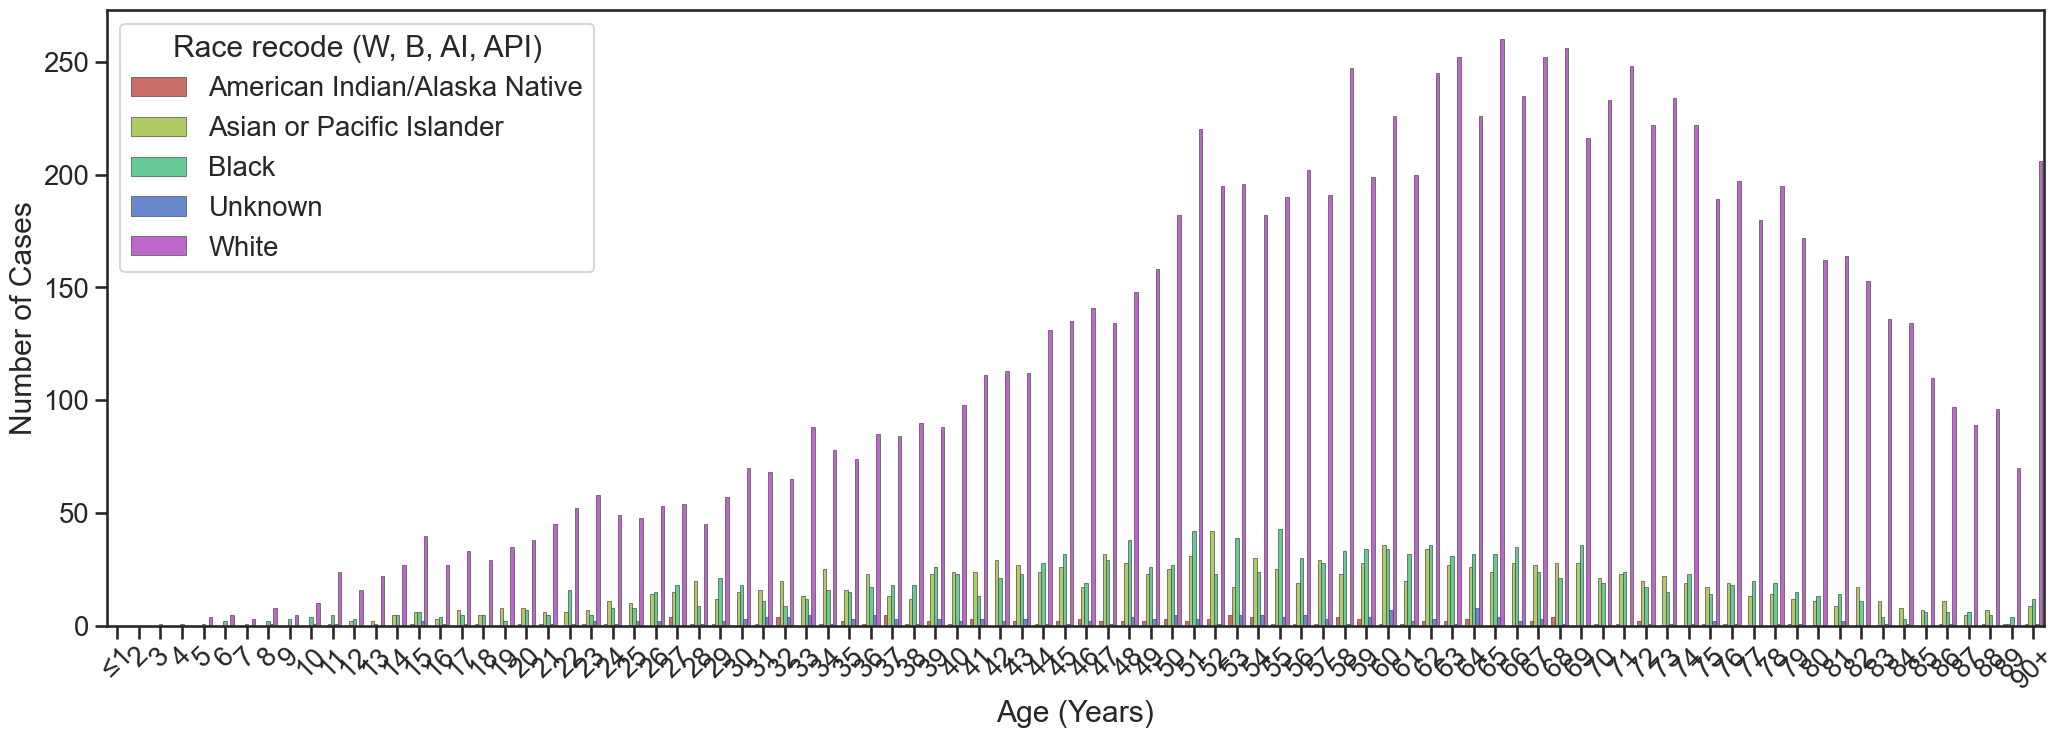

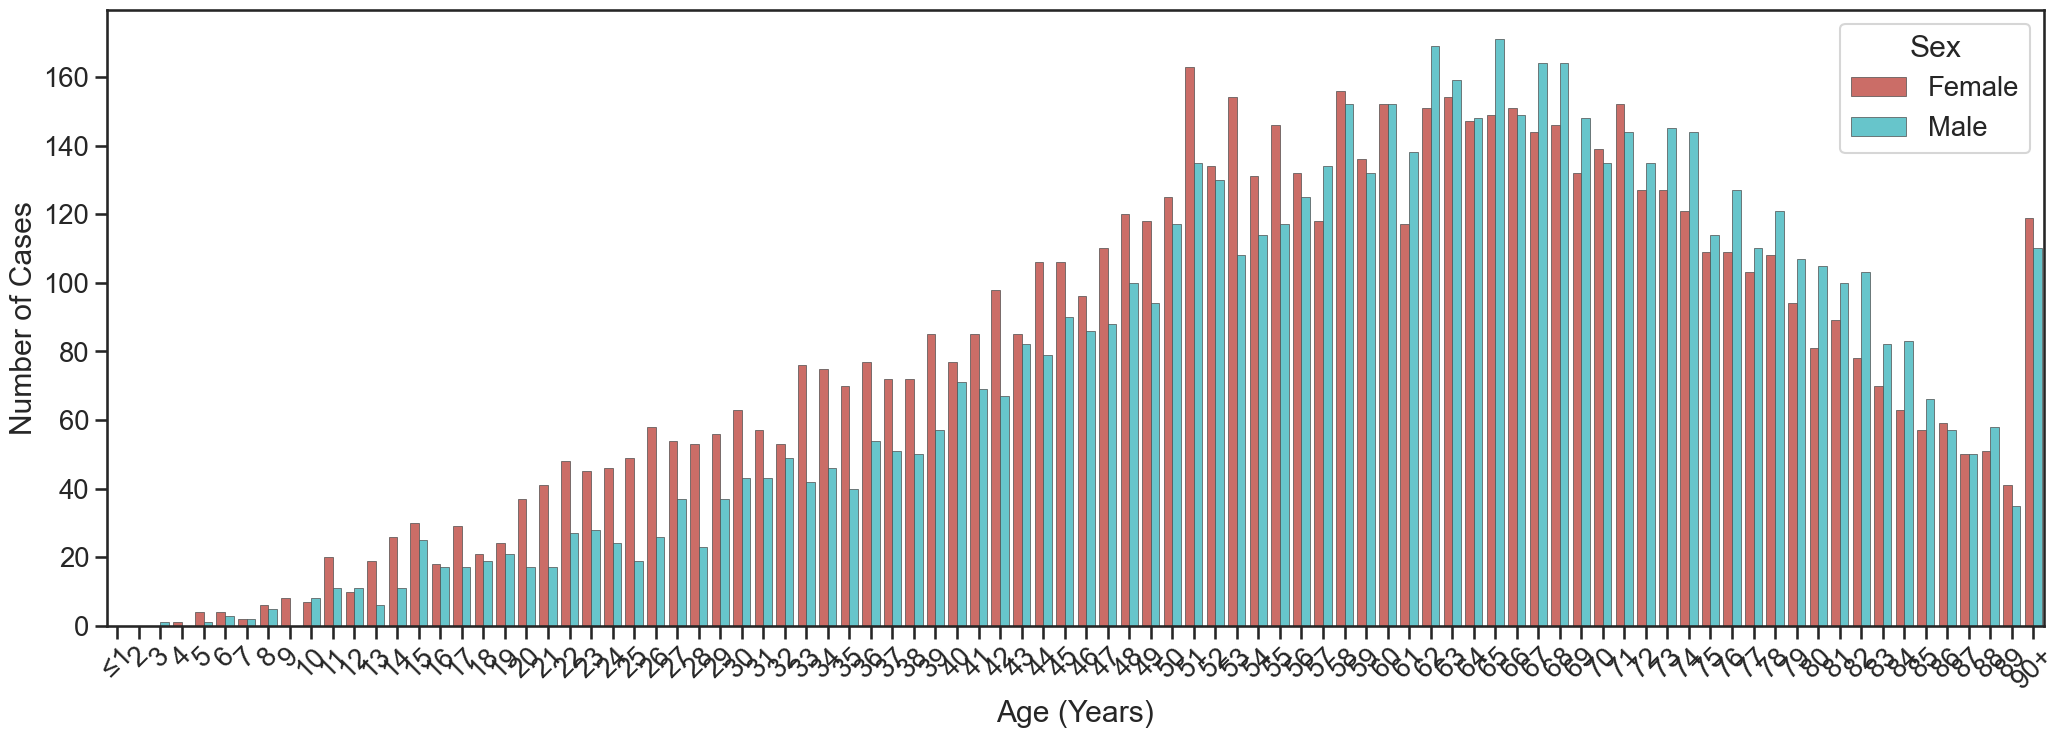

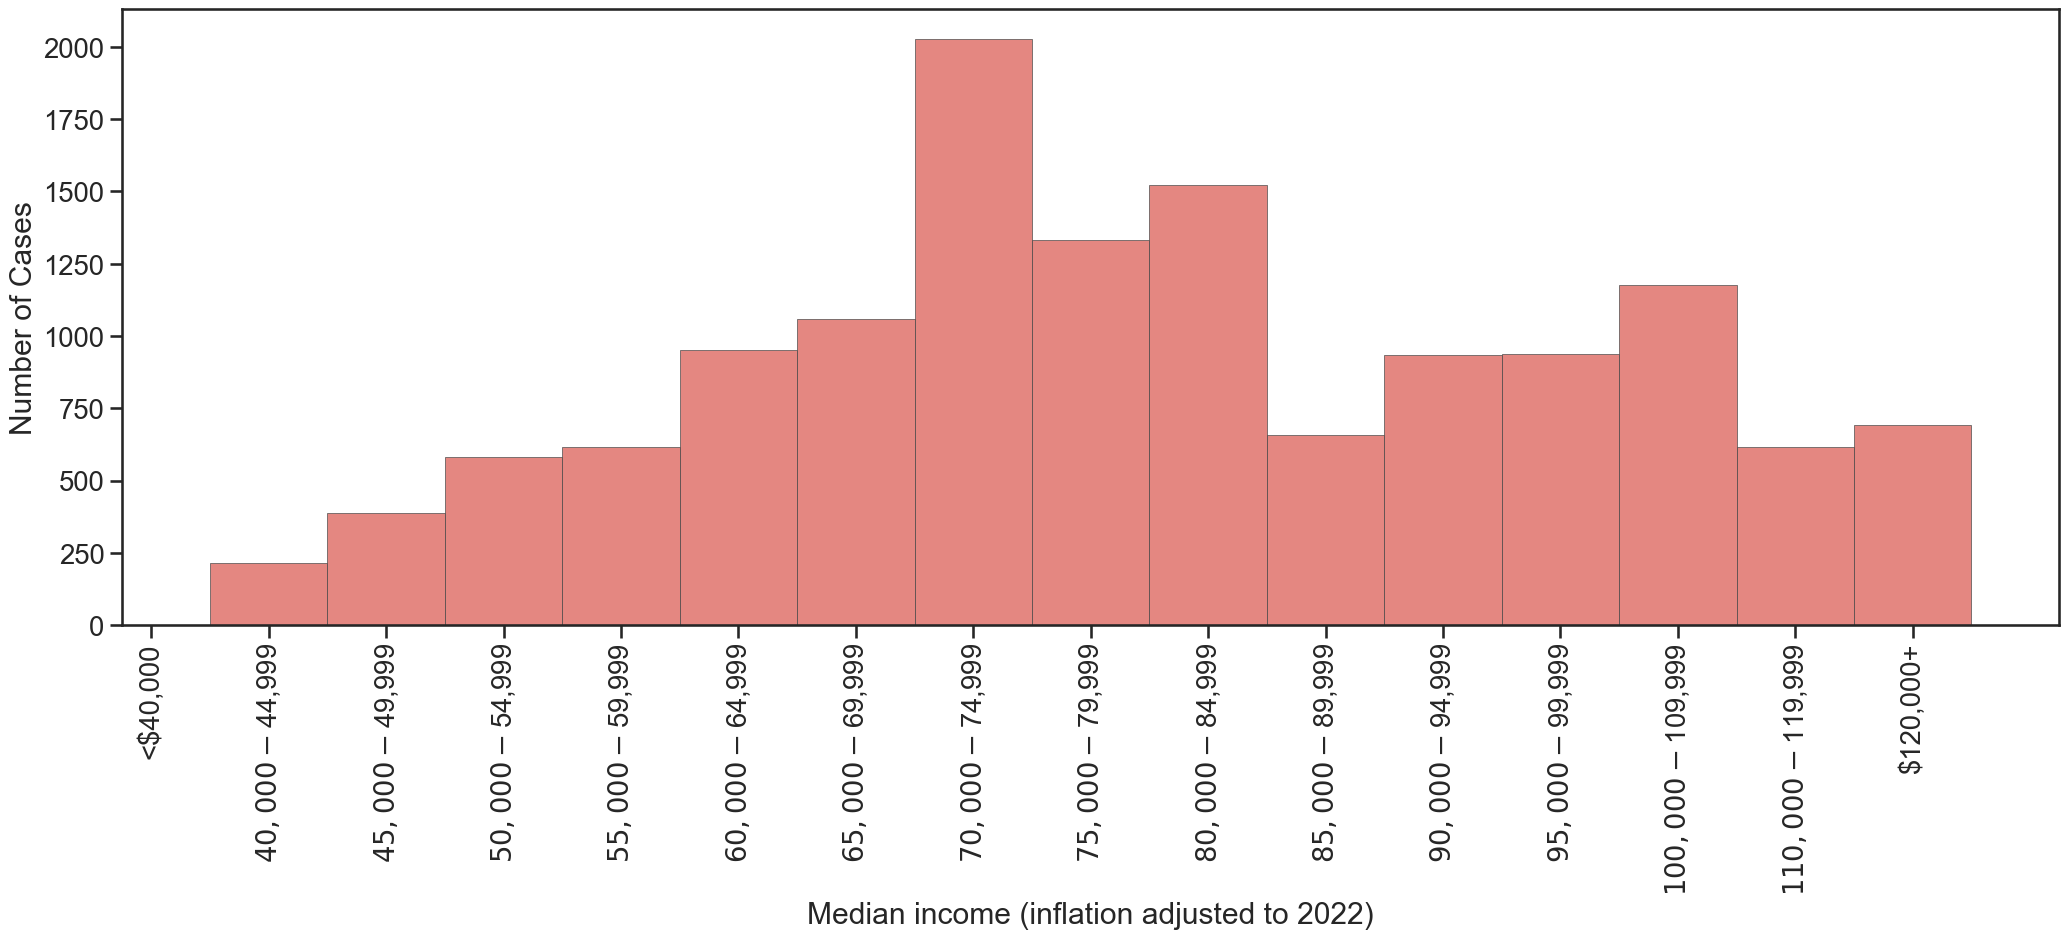

In [58]:
# Plot - countplot
sns.set_context('talk',font_scale=1.2)
sns.set_palette('hls')

# Race vs. Age
plt.figure(figsize=(25, 8))
racevage_histplot = sns.countplot(
    data=filtered_df,
    x=age_colname,
    hue=race_colname,
    palette='hls',
    linewidth=0.5,
    edgecolor=".3",
    log_scale=False
)
x_labels = racevage_histplot.get_xticklabels()

# Rotate x tick labels
racevage_histplot.set_xticklabels(x_labels, rotation=45)

racevage_histplot.set_xlabel('Age (Years)')
racevage_histplot.set_ylabel('Number of Cases')

# Sex vs. Age
plt.figure(figsize=(25, 8))
sexvage_countplot = sns.countplot(
    data=filtered_df,
    x=age_colname,
    hue=sex_colname,
    palette='hls',
    linewidth=0.5,
    edgecolor=".3",
    log_scale=False
)

# Rotate x tick labels
x_labels = sexvage_countplot.get_xticklabels()
sexvage_countplot.set_xticklabels(x_labels, rotation=45)
# sexvage_countplot.set_xticklabels(x_labels,rotation=90)
sexvage_countplot.set_xlabel('Age (Years)')
sexvage_countplot.set_ylabel('Number of Cases')

plt.figure(figsize=(25, 8))
ses_countplot = sns.histplot(
    data=filtered_df,
    x=ses_colname,
    palette='hls',
    linewidth=0.5,
    edgecolor=".3",
    log_scale=False
)

ses_countplot.set_xticklabels(ses_countplot.get_xticklabels(),rotation=90)
ses_countplot.set_xlabel('Median income (inflation adjusted to 2022)')
ses_countplot.set_ylabel('Number of Cases')


/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_31248/3071125564.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = filtered_df.pivot_table(index=age_bin_colname, columns=ses_colname, aggfunc='size', fill_value=0)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 [Text(0, 0.5, '0-4'),
  Text(0, 1.5, '5-9'),
  Text(0, 2.5, '10-14'),
  Text(0, 3.5, '15-19'),
  Text(0, 4.5, '20-24'),
  Text(0, 5.5, '25-29'),
  Text(0, 6.5, '30-34'),
  Text(0, 7.5, '35-39'),
  Text(0, 8.5, '40-44'),
  Text(0, 9.5, '45-49'),
  Text(0, 10.5, '50-54'),
  Text(0, 11.5, '55-59'),
  Text(0, 12.5, '60-64'),
  Text(0, 13.5, '65-69'),
  Text(0, 14.5, '70-74'),
  Text(0, 15.5, '75-79'),
  Text(0, 16.5, '80-84'),
  Text(0, 17.5, '85-89'),
  Text(0, 18.5, '90+')])

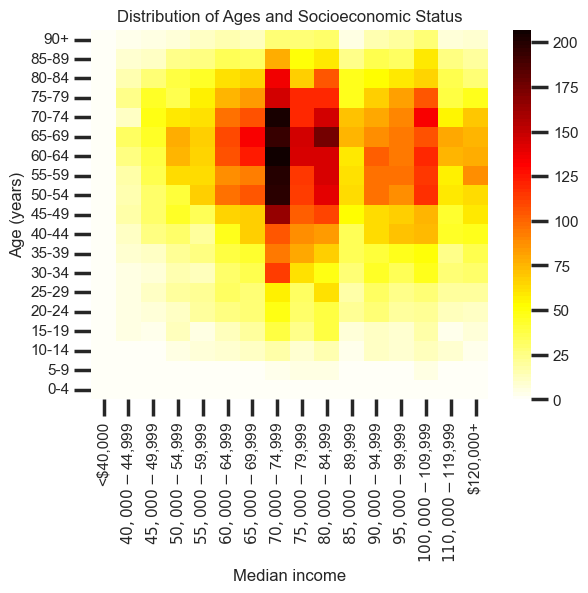

In [59]:
# Heatmap of age and socioeconomic
sns.set_context('poster',font_scale=.5)
# Create a pivot table that calculates the count of occurrences for each age and SES combination
# 
heatmap_data = filtered_df.pivot_table(index=age_bin_colname, columns=ses_colname, aggfunc='size', fill_value=0)

# Generate the RdYlGn palette with a specific number of colors
palette = sns.color_palette("hot_r",n_colors=100)
# Remove the darkest green, which is typically the last color in the RdYlGn palette
# You can adjust the indices depending on which colors you want to remove
# modified_palette = palette[:-1]  # This removes the last color

# Convert the modified list of colors to a colormap
cmap = sns.color_palette(palette, as_cmap=True)

# Create the heatmap
ses_heat = sns.heatmap(heatmap_data, cmap=cmap, annot=False, fmt='d')
ses_heat.invert_yaxis()
plt.title('Distribution of Ages and Socioeconomic Status')
plt.xlabel('Median income')
plt.ylabel('Age (years)')
# plt.show()
# Rotate the y-axis labels
plt.yticks(rotation=0)  # Rotate y-axis labels to be horizontal (90º from the default)
# plt.close()

In [67]:
# Histology order
histology_order = ['Adenoid Cystic Carcinoma','Mucoepidermoid Carcinoma','Adenocarcinoma','Mixed Subtypes','Other Rare Types']
filtered_df['Histology'] = pd.Categorical(filtered_df['Histology'],categories=histology_order, ordered=True)
# For plotting facetgrid
filtered_df_forFacetGrid = filtered_df[filtered_df["Histology"].isin(['Adenoid Cystic Carcinoma','Mucoepidermoid Carcinoma','Adenocarcinoma'])]

filtered_df_forFacetGrid['Histology'] = filtered_df_forFacetGrid['Histology'].cat.remove_unused_categories()

/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_31248/1867867638.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Histology'] = pd.Categorical(filtered_df['Histology'],categories=histology_order, ordered=True)
/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_31248/1867867638.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_forFacetGrid['Histology'] = filtered_df_forFacetGrid['Histology'].cat.remove_unused_categories()


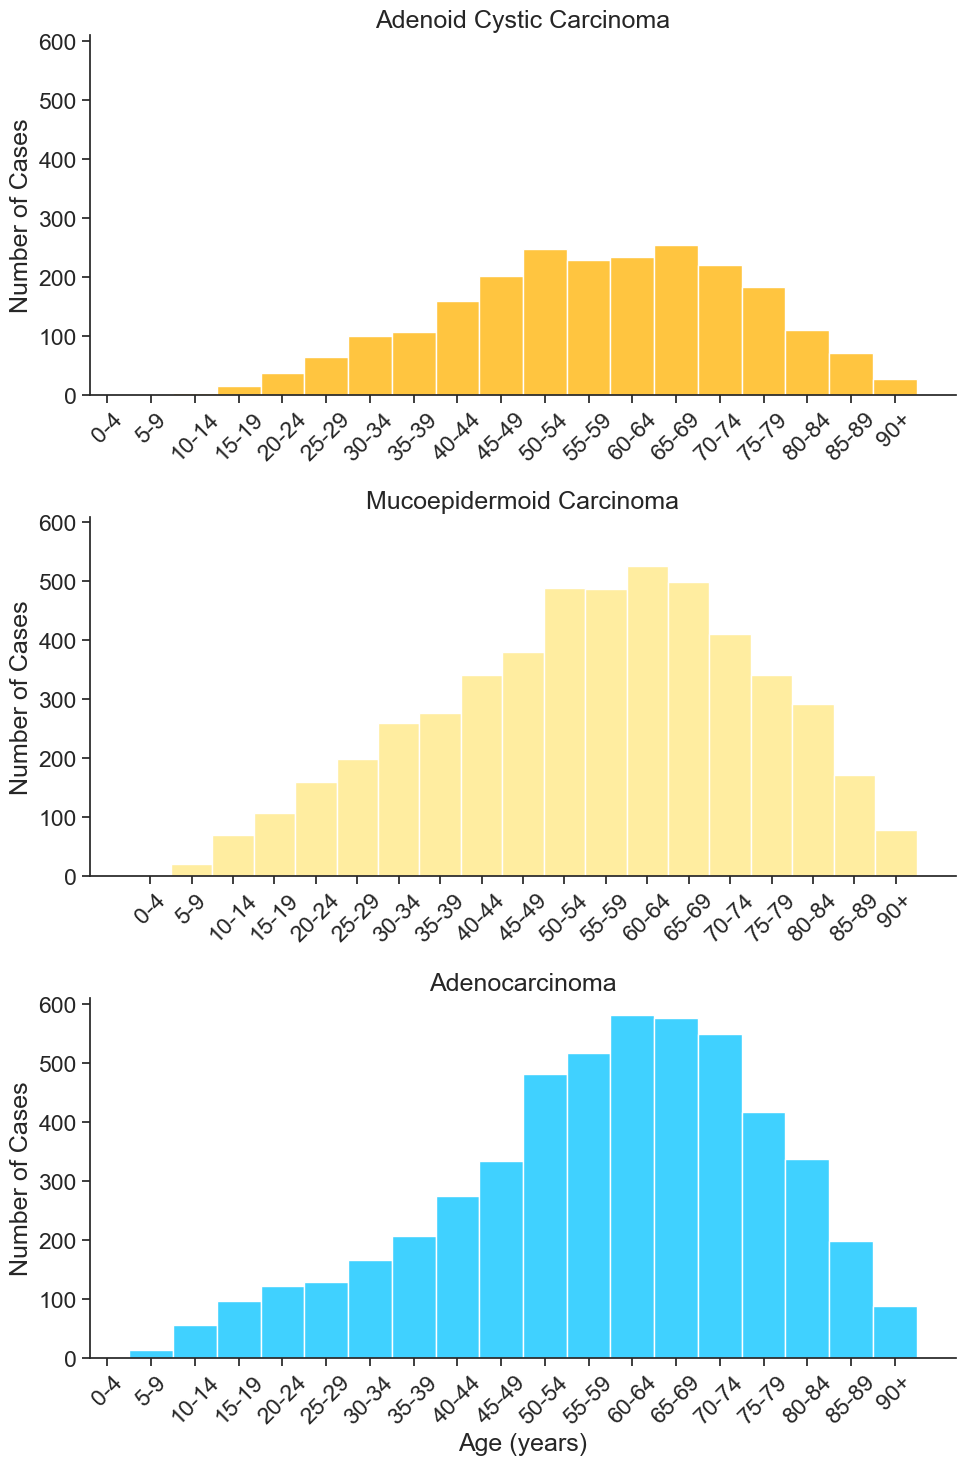

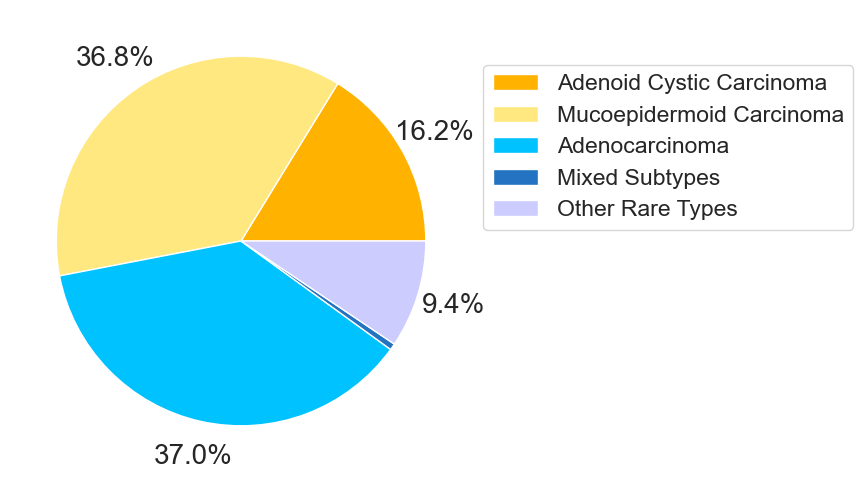

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure these colors match your pie chart colors
colors = ['#ffb200', '#ffe880', '#00c2ff', '#2473c2','#ccccff']  # Adjust colors as needed

# Create a color mapping based on unique histology types
unique_histologies_1 = filtered_df_forFacetGrid['Histology'].unique()
color_mapping_1 = dict(zip(unique_histologies_1, colors[0:3]))

unique_histologies_2 = filtered_df['Histology'].unique()
color_mapping_2 = dict(zip(unique_histologies_2, colors))

# Set the context for better visibility
sns.set_context("notebook", font_scale=1.5)

# Create a FacetGrid instead of using displot
g = sns.FacetGrid(filtered_df_forFacetGrid, col="Histology", col_wrap=1, height=5, aspect=2, sharex=False)
g.map_dataframe(sns.histplot, x=age_bin_colname, binwidth=1, hue='Histology', palette=color_mapping_1, multiple='stack')

# Rotate the x-tick labels in each facet
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Set labels and titles
g.set_xlabels('Age (years)')
g.set_ylabels('Number of Cases')
g.set_titles(col_template="{col_name}")

plt.tight_layout()
plt.show()

# Calculate tumor site counts
tumor_type_counts = filtered_df['Histology'].value_counts(normalize=True)
ordered_counts = tumor_type_counts[histology_order]
ordered_labels = histology_order

labels = tumor_type_counts.index

# Create pie chart
plt.figure(figsize=(8, 6))
# Define a function as an input to autopct:
def autopct_format(pct):
    return ('%1.1f%%' % pct) if pct >= 1 else ''

# Create the pie chart with specified font sizes
patches, texts, autotexts = plt.pie(
    ordered_counts, labels=None, autopct=autopct_format,
    pctdistance=1.2, colors=colors
)

# Adjust the font size for the pie chart
for text in texts:
    text.set_fontsize(16)
for autotext in autotexts:
    autotext.set_fontsize(20)

# Add legend
plt.legend(patches, ordered_labels, loc='best', bbox_to_anchor=(1, 0.5))

plt.show()


In [14]:
# Select relevant columns for clinical characteristics analysis
clinical_columns = ['Primary Site - labeled', 'Histologic Type ICD-O-3',
                     'Grade Recode (thru 2017)', 'Derived Summary Grade 2018 (2018+)',
                     'Grade Clinical (2018+)', 'Grade Pathological (2018+)', 'Laterality',
                     'Diagnostic Confirmation', 'ICD-O-3 Hist/behav',
                     'ICD-O-3 Hist/behav, malignant','Histology','ICD-O-3 Code','SEER cause-specific death classification',
                    'SEER other cause of death classification', 'Survival months',
                    'Survival months flag', 'COD to site rec KM',
                    'COD to site recode ICD-O-3 2023 Revision',
                    'COD to site recode ICD-O-3 2023 Revision Expanded (1999+)',
                    'Vital status recode (study cutoff used)', 'Sequence number',
                    'First malignant primary indicator', 'Primary by international rules']

# Creating a summary for clinical characteristics
clinical_summary = filtered_df[clinical_columns]

# Display the summary
display(clinical_summary)

vital_percentages = clinical_summary["Vital status recode (study cutoff used)"].value_counts(normalize=True) * 100
alive_percentage = vital_percentages["Alive"]
dead_percentage = vital_percentages["Dead"]

print(vital_percentages)

,Primary Site - labeled,Histologic Type ICD-O-3,Grade Recode (thru 2017),Derived Summary Grade 2018 (2018+),Grade Clinical (2018+),Grade Pathological (2018+),Laterality,Diagnostic Confirmation,ICD-O-3 Hist/behav,"ICD-O-3 Hist/behav, malignant",...,SEER other cause of death classification,Survival months,Survival months flag,COD to site rec KM,COD to site recode ICD-O-3 2023 Revision,COD to site recode ICD-O-3 2023 Revision Expanded (1999+),Vital status recode (study cutoff used),Sequence number,First malignant primary indicator,Primary by international rules
0,C07.9-Parotid gland,8041,Poorly differentiated; Grade III,Blank(s),Blank(s),Blank(s),Right - origin of primary,Positive histology,"8041/3: Small cell carcinoma, NOS","8041/3: Small cell carcinoma, NOS",...,Dead (attributable to causes other than this c...,14.0,Complete dates are available and there are mor...,Myeloma,Plasma Cell Neoplasms and Immunoproliferative ...,Plasma Cell Neoplasms,Dead,3rd of 3 or more primaries,No,Yes
3,C07.9-Parotid gland,8200,Unknown,9,9,9,Right - origin of primary,Positive histology,8200/3: Adenoid cystic carcinoma,8200/3: Adenoid cystic carcinoma,...,Alive or dead due to cancer,25.0,Complete dates are available and there are mor...,Alive,Alive,Alive,Alive,4th of 4 or more primaries,No,Yes
5,C07.9-Parotid gland,8041,Undifferentiated; anaplastic; Grade IV,Blank(s),Blank(s),Blank(s),Right - origin of primary,Positive histology,"8041/3: Small cell carcinoma, NOS","8041/3: Small cell carcinoma, NOS",...,Dead (attributable to causes other than this c...,11.0,Complete dates are available and there are mor...,Cerebrovascular Diseases,Cerebrovascular diseases,Cerebrovascular diseases,Dead,3rd of 3 or more primaries,No,Yes
6,C07.9-Parotid gland,8430,Well differentiated; Grade I,Blank(s),Blank(s),Blank(s),Right - origin of primary,Positive histology,8430/3: Mucoepidermoid carcinoma,8430/3: Mucoepidermoid carcinoma,...,Alive or dead due to cancer,210.0,Complete dates are available and there are mor...,Alive,Alive,Alive,Alive,2nd of 2 or more primaries,No,Yes
7,C07.9-Parotid gland,8430,Unknown,A,A,A,Left - origin of primary,Positive histology,8430/3: Mucoepidermoid carcinoma,8430/3: Mucoepidermoid carcinoma,...,Alive or dead due to cancer,34.0,Complete dates are available and there are mor...,Alive,Alive,Alive,Alive,2nd of 2 or more primaries,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28014,C07.9-Parotid gland,8550,Unknown,9,9,9,Right - origin of primary,Positive histology,8550/3: Acinar cell carcinoma,8550/3: Acinar cell carcinoma,...,Alive or dead due to cancer,9.0,Complete dates are available and there are mor...,Alive,Alive,Alive,Alive,One primary only,Yes,Yes
28015,C07.9-Parotid gland,8550,Unknown,C,C,C,Left - origin of primary,Positive histology,8550/3: Acinar cell carcinoma,8550/3: Acinar cell carcinoma,...,Alive or dead due to cancer,11.0,Complete dates are available and there are mor...,Alive,Alive,Alive,Alive,2nd of 2 or more primaries,No,Yes
28020,C07.9-Parotid gland,8430,Unknown,9,9,9,Right - origin of primary,Positive histology,8430/3: Mucoepidermoid carcinoma,8430/3: Mucoepidermoid carcinoma,...,Alive or dead due to cancer,10.0,Complete dates are available and there are mor...,Alive,Alive,Alive,Alive,One primary only,Yes,Yes
28024,C08.0-Submandibular gland,8430,Unknown,B,B,B,Right - origin of primary,Positive histology,8430/3: Mucoepidermoid carcinoma,8430/3: Mucoepidermoid carcinoma,...,Alive or dead due to cancer,3.0,Complete dates are available and there are mor...,Alive,Alive,Alive,Alive,One primary only,Yes,Yes


Vital status recode (study cutoff used)
Alive    64.362431
Dead     35.637569
Name: proportion, dtype: float64


/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_41853/967856176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Survival months'] = filtered_df['Survival months'].replace("Unknown", np.nan)
/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_41853/967856176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Survival months'] = pd.to_numeric(filtered_df['Survival months'])
/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_41853/967856176.py:6: Setting

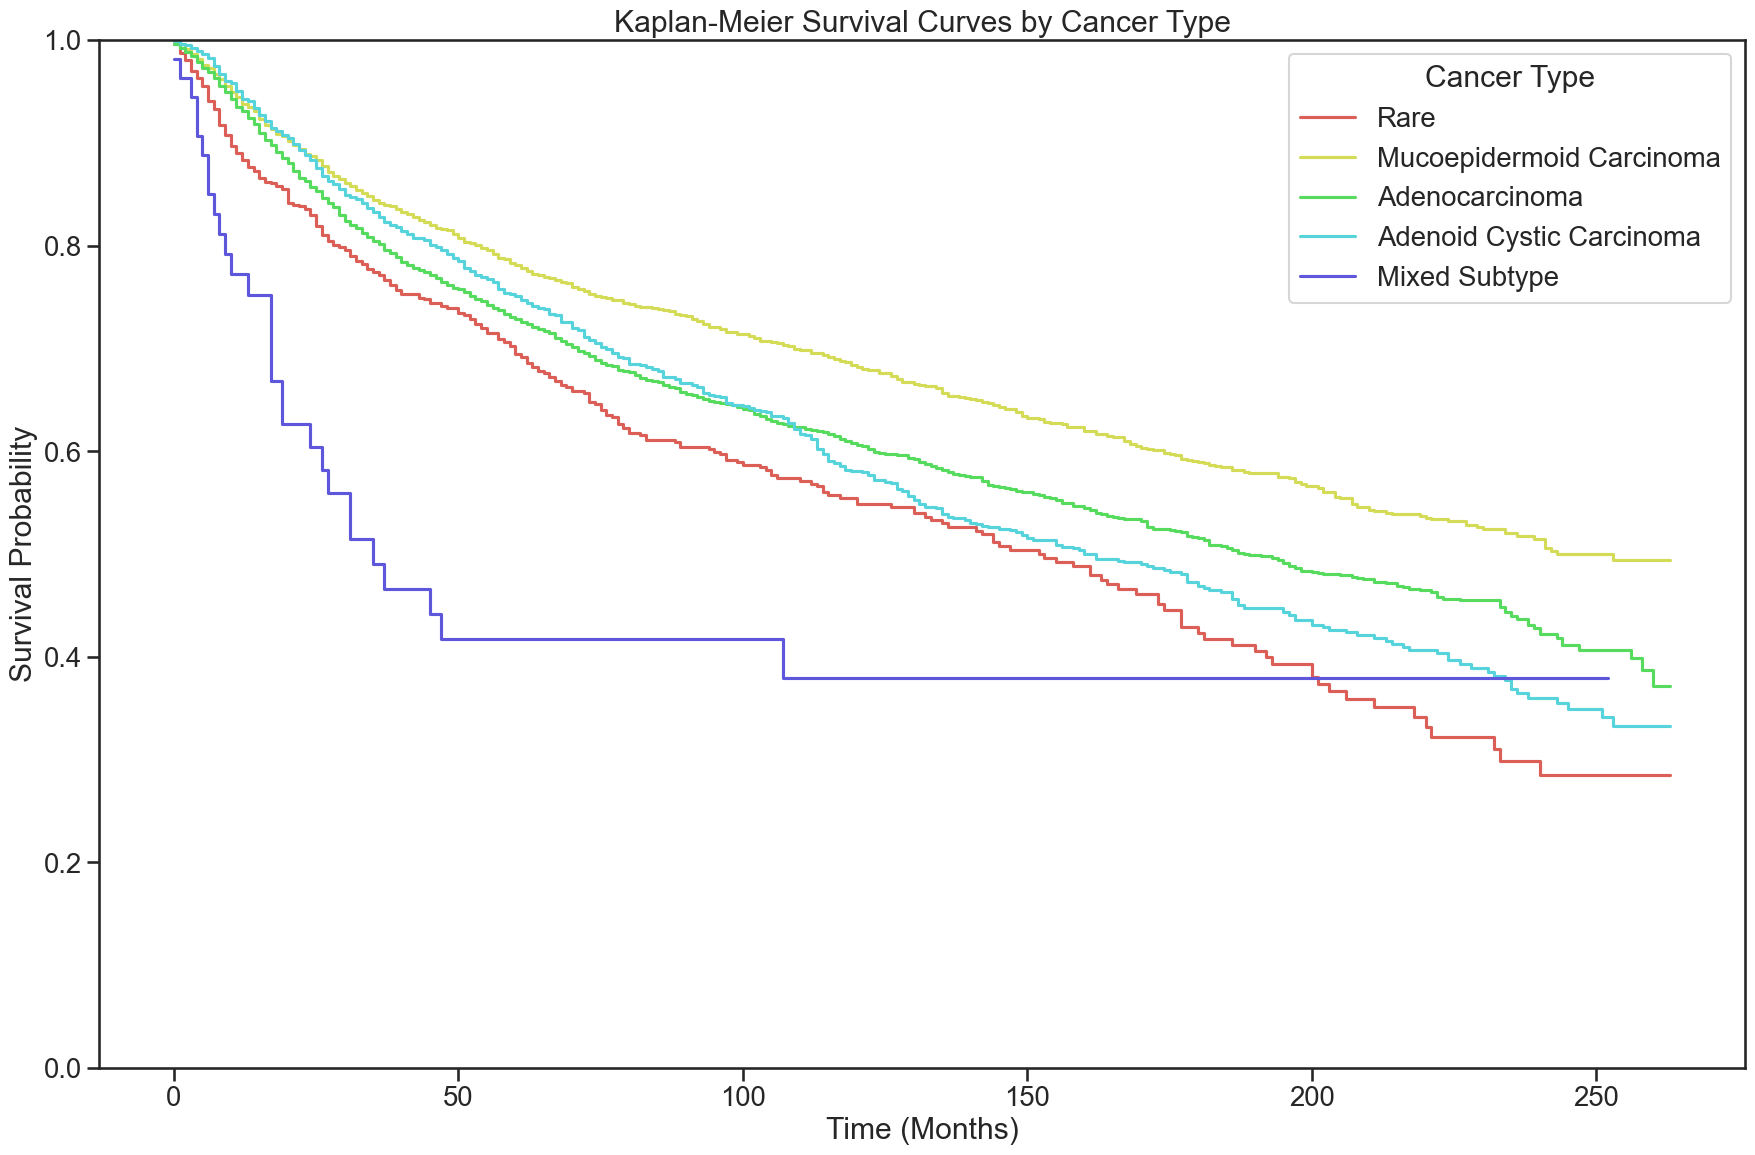

In [40]:
# Replace "Unknown" with nan's 
filtered_df['Survival months'] = filtered_df['Survival months'].replace("Unknown", np.nan)
# Change to numeric
filtered_df['Survival months'] = pd.to_numeric(filtered_df['Survival months'])

filtered_df['event_occurred'] = filtered_df['Vital status recode (study cutoff used)'].apply(
    lambda x: 1 if x == 'Dead'
# else 2 if x == 'Dead (missing/unknown COD)'
else 0)

df = filtered_df.dropna()

# Instantiate the Kaplan-Meier fitter
kmf = KaplanMeierFitter()
# Define the unique cancer types in your dataset
cancer_types = df['Histology'].unique()

# Create the plot
plt.figure(figsize=(18, 12))

# Loop over each cancer type to plot Kaplan-Meier curves
for cancer_type in cancer_types:
    # Filter the DataFrame for each cancer type
    df_cancer = df[df['Histology'] == cancer_type]
    
    # Fit the Kaplan-Meier model
    kmf.fit(durations=df_cancer['Survival months'], event_observed=df_cancer['event_occurred'], label=cancer_type)

    # Plot the survival function for this cancer type
    kmf.plot_survival_function(ci_show=False)

# Customize the plot
plt.title('Kaplan-Meier Survival Curves by Cancer Type')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.ylim(0,1)
plt.legend(title='Cancer Type')
plt.tight_layout()

# Show the plot
plt.show()

In [37]:
for cancer_type in cancer_types:
    print(type(cancer_type))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
